# Objective

Build a predictive modeling algorithm to predict mileage of cars based on given input variables

In [2]:
#data preparation and analytics library
import pandas as pd
#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
#library for creating random samples
from sklearn.model_selection import train_test_split
#library for building linear regression model
from sklearn.linear_model import LinearRegression
#library for feature selection
from sklearn.feature_selection import SelectKBest,f_regression

In [3]:
#import data
df=pd.read_csv(r"C:\Users\user\Desktop\Introtallent\Python\data\automobile mileage prediction\automobile data.csv")

In [4]:
df.head(2)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,8.0,8,307.0,130,3504,12.0,2015,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,2015,1,buick


In [5]:
#print rows and column count
df.shape

(398, 9)

In [6]:
#check dtypes
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object

In [7]:
#cylinders,model_year and origin are categorical variables stored as int
#change the datatype to object
df['Cylinders']=df['Cylinders'].astype('object')
df['Model_year']=df['Model_year'].astype('object')
df['Origin']=df['Origin'].astype('object')

In [8]:
df.dtypes

MPG             float64
Cylinders        object
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model_year       object
Origin           object
Car_Name         object
dtype: object

In [9]:
df['Horsepower']=pd.to_numeric(df['Horsepower'],errors='coerce')

In [10]:
df.dtypes

MPG             float64
Cylinders        object
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Model_year       object
Origin           object
Car_Name         object
dtype: object

In [11]:
#feature engineering-check and impute missing values , if any
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model_year      0
Origin          0
Car_Name        0
dtype: int64

In [12]:
#impute Horsepower with median
df['Horsepower']=df['Horsepower'].fillna(df['Horsepower'].median())

In [13]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model_year      0
Origin          0
Car_Name        0
dtype: int64

In [14]:
#feature engineering-outlier treatment

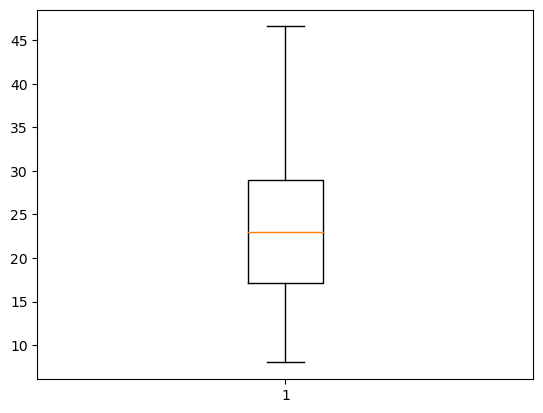

In [15]:
#outlier test in MPG variable
plt.boxplot(df['MPG'])
plt.show()

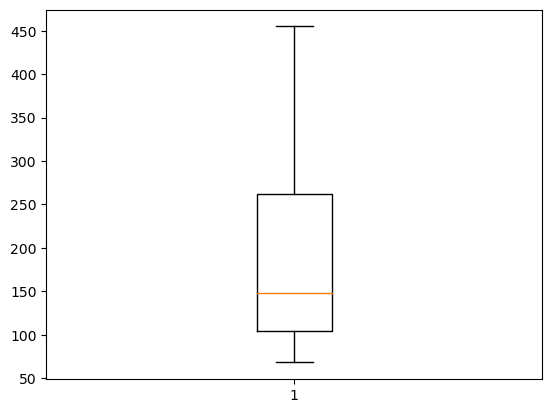

In [16]:
#outlier test in displacement variable
plt.boxplot(df['Displacement'])
plt.show()

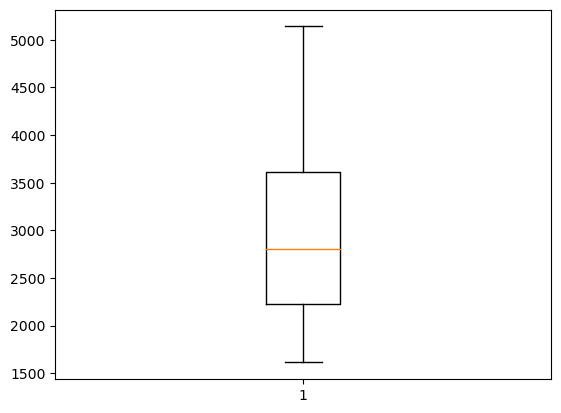

In [17]:
#outlier test in Weight variable
plt.boxplot(df['Weight'])
plt.show()

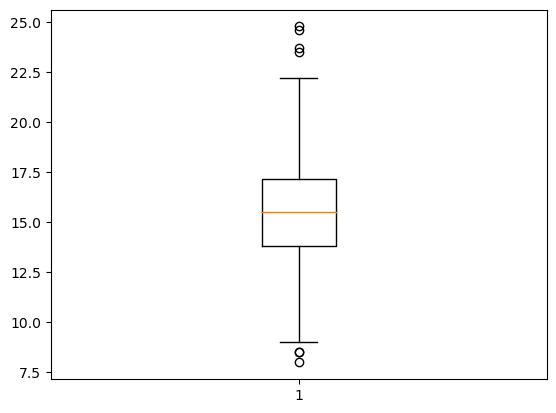

In [18]:
#outlier test in acceleration variable
plt.boxplot(df['Acceleration'])
plt.show()

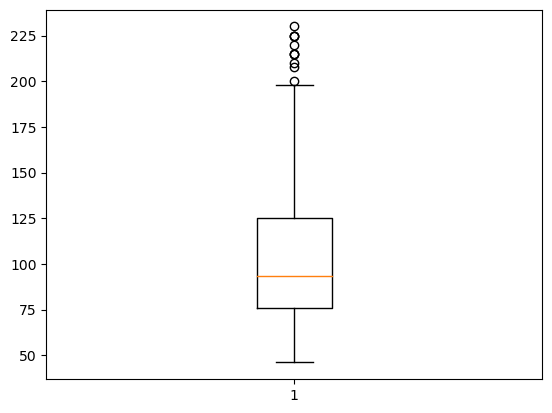

In [19]:
#outlier test for Horsepower variable
plt.boxplot(df['Horsepower'])
plt.show()

In [20]:
#user defined function to remove outliers
def remove_outliers(d,c):
    q1=d[c].quantile(0.25)
    q3=d[c].quantile(0.75)
    iqr=q3-q1
    ub=q3+1.5*iqr
    lb=q1-1.5*iqr
    result=d[(d[c]>=lb)&(d[c]<=ub)]
    return result

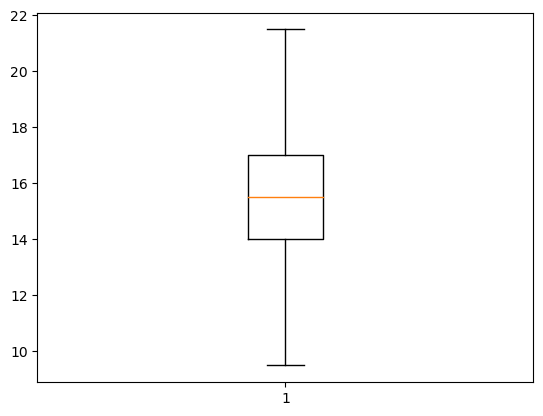

In [25]:
df=remove_outliers(df,'Acceleration')
plt.boxplot(df['Acceleration'])
plt.show()

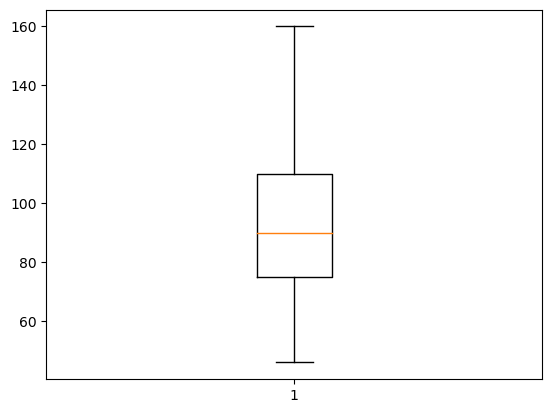

In [28]:
df=remove_outliers(df,'Horsepower')
plt.boxplot(df['Horsepower'])
plt.show()

## EDA

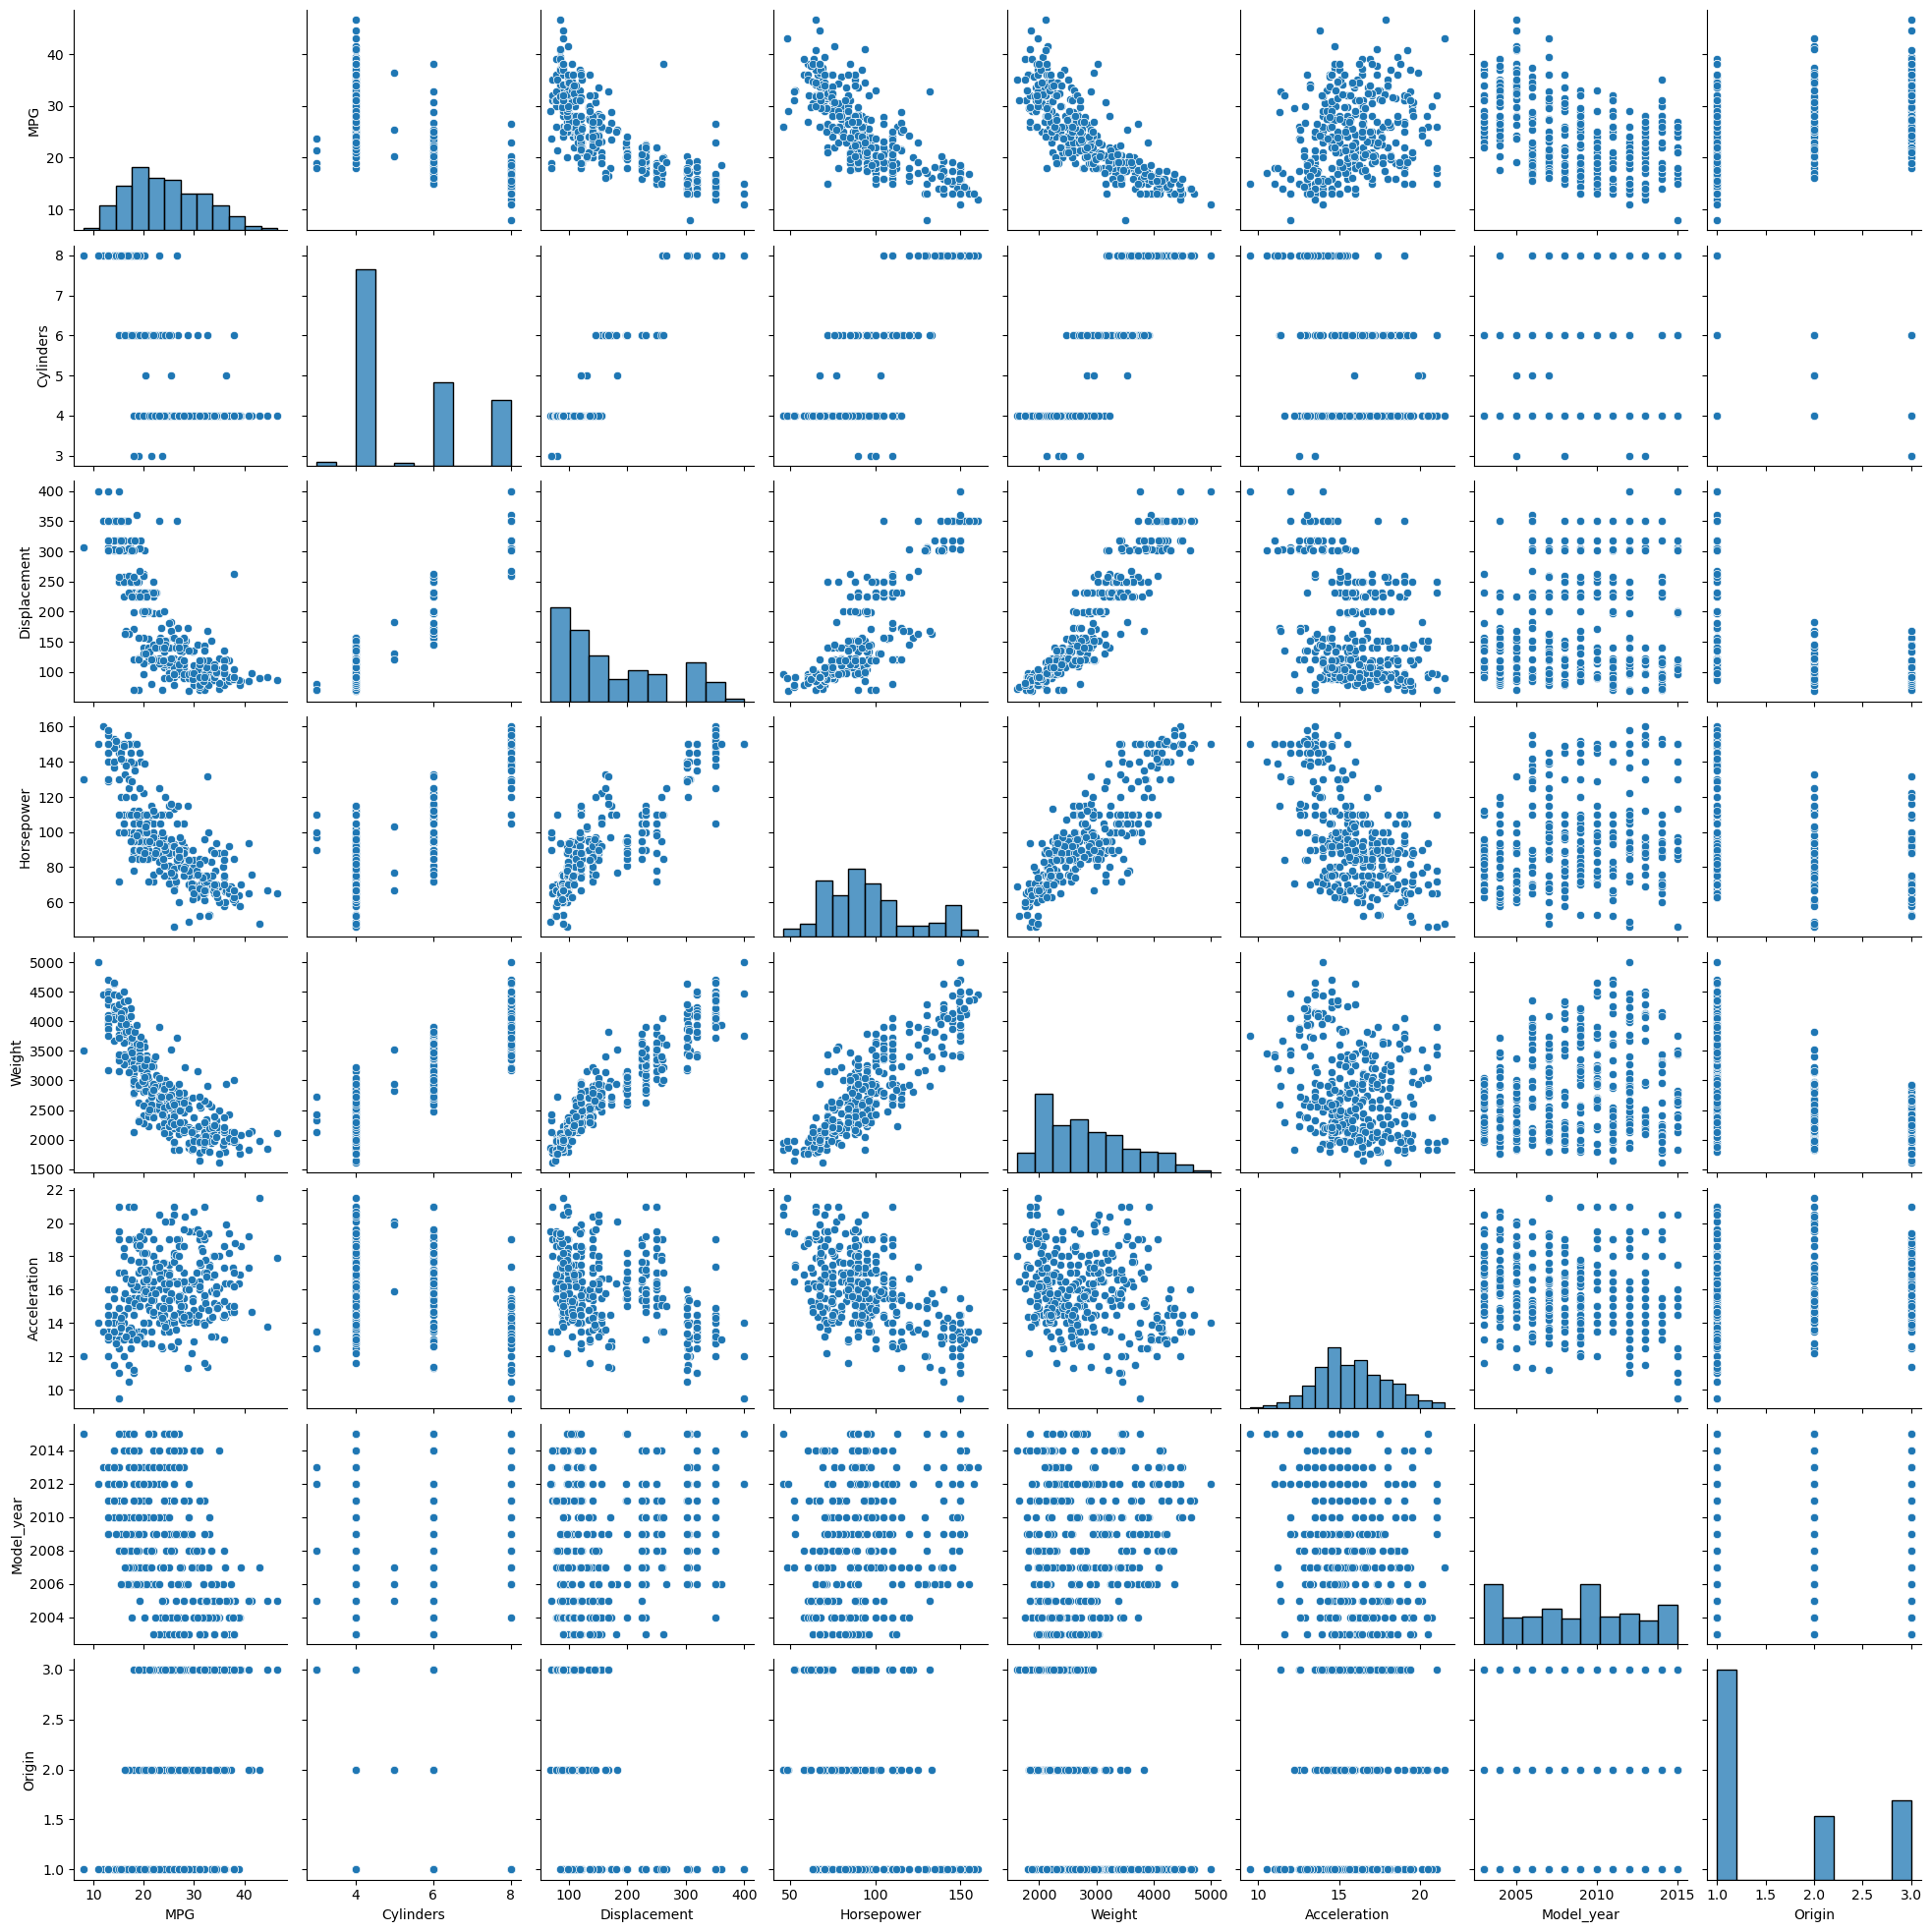

In [29]:
#create pairplot
sns.pairplot(df)

In [30]:
#data mix
#cylinders,model_year,origin,car_name

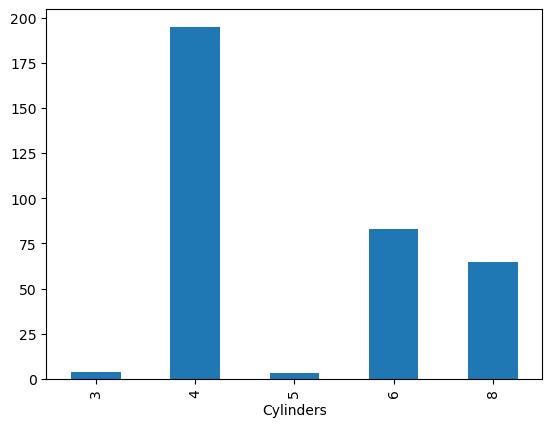

In [31]:
df.groupby('Cylinders')['Cylinders'].count().plot(kind='bar')
plt.show()

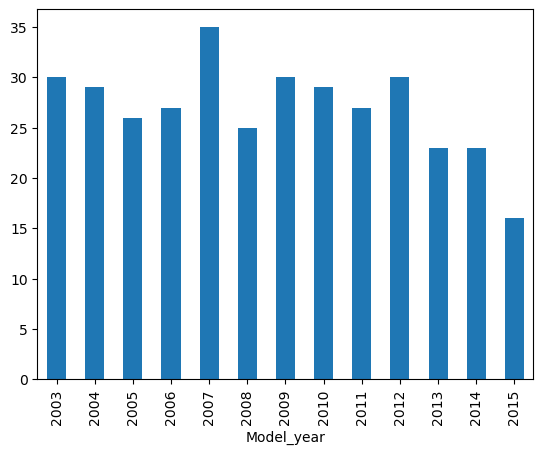

In [32]:
df.groupby('Model_year')['Model_year'].count().plot(kind='bar')
plt.show()

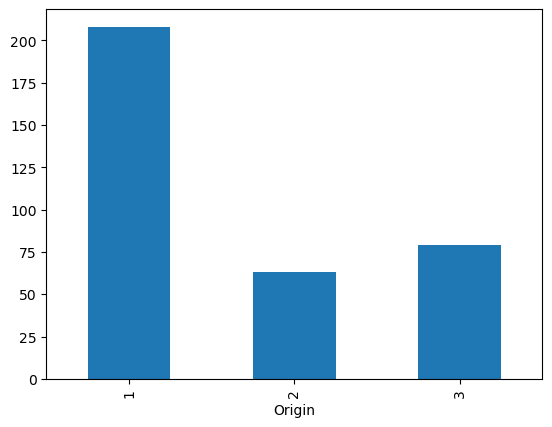

In [33]:
df.groupby('Origin')['Origin'].count().plot(kind='bar')
plt.show()

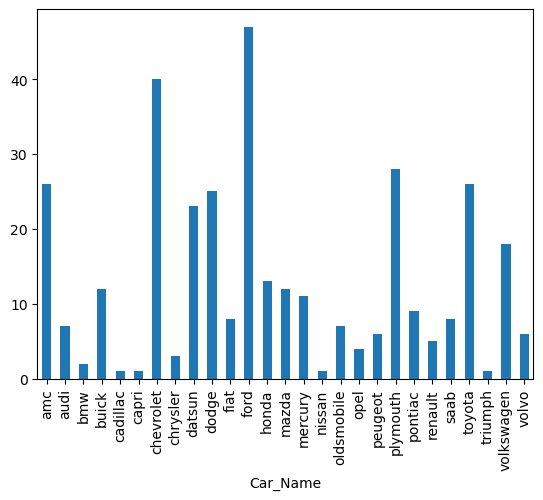

In [34]:
df.groupby('Car_Name')['Car_Name'].count().plot(kind='bar')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_5348\4270462467.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MPG'])


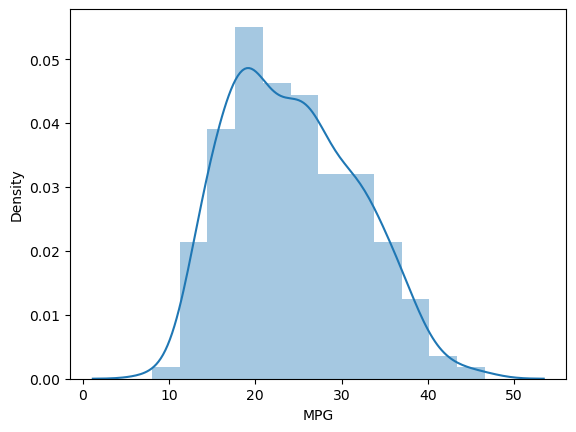

In [35]:
#distribution
sns.distplot(df['MPG'])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_5348\2749857504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Displacement'])


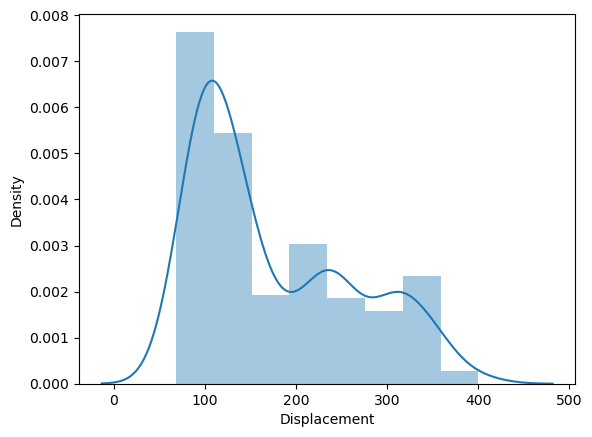

In [36]:
sns.distplot(df['Displacement'])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_5348\2601973532.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


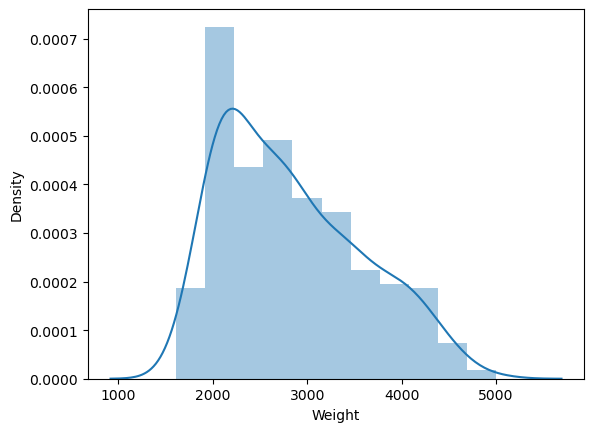

In [37]:
sns.distplot(df['Weight'])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_5348\1277770677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Acceleration'])


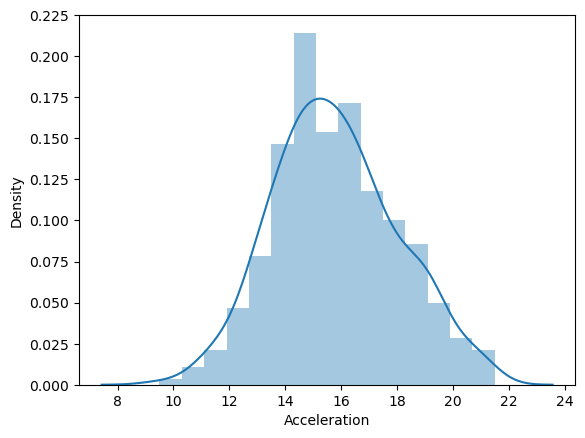

In [38]:
sns.distplot(df['Acceleration'])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_5348\4094932731.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Horsepower'])


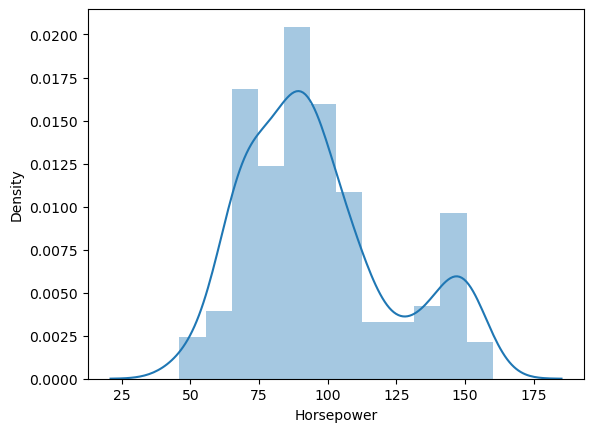

In [39]:
sns.distplot(df['Horsepower'])
plt.show()

In [40]:
#check object variables for spelling differences

In [41]:
df['Cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=object)

In [42]:
df['Model_year'].unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003], dtype=object)

In [43]:
df['Origin'].unique()

array([1, 3, 2], dtype=object)

In [44]:
df['Car_Name'].unique()

array(['chevrolet', 'plymouth', 'amc', 'ford', 'toyota', 'datsun',
       'volkswagen', 'peugeot', 'audi', 'saab', 'bmw', 'pontiac',
       'mercury', 'opel', 'fiat', 'dodge', 'buick', 'oldsmobile', 'mazda',
       'volvo', 'renault', 'honda', 'capri', 'chrysler', 'cadillac',
       'triumph', 'nissan'], dtype=object)

## Feature engineering: One hot encoding(dummy conversion)

In [45]:
#store categorical variables in a new dataframe
df_categorical=df.select_dtypes(include=['object'])

In [46]:
df_categorical.head()

,Cylinders,Model_year,Origin,Car_Name
0,8,2015,1,chevrolet
2,8,2015,1,plymouth
3,8,2015,1,amc
4,8,2015,1,ford
12,8,2015,1,chevrolet


In [47]:
#create dummy
dummy=pd.get_dummies(df_categorical,drop_first=True)

C:\Users\user\AppData\Local\Temp\ipykernel_5348\1179868161.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  dummy=pd.get_dummies(df_categorical,drop_first=True)


In [48]:
dummy.head()

,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Model_year_2004,Model_year_2005,Model_year_2006,Model_year_2007,Model_year_2008,Model_year_2009,...,Car_Name_opel,Car_Name_peugeot,Car_Name_plymouth,Car_Name_pontiac,Car_Name_renault,Car_Name_saab,Car_Name_toyota,Car_Name_triumph,Car_Name_volkswagen,Car_Name_volvo
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#combine numeric columns from df with dummy columns to create final data
df_numeric=df.select_dtypes(include=['int64','float64'])

In [50]:
df_master=pd.concat([df_numeric,dummy],axis=1)

In [51]:
df_master.head()

,MPG,Displacement,Horsepower,Weight,Acceleration,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Model_year_2004,...,Car_Name_opel,Car_Name_peugeot,Car_Name_plymouth,Car_Name_pontiac,Car_Name_renault,Car_Name_saab,Car_Name_toyota,Car_Name_triumph,Car_Name_volkswagen,Car_Name_volvo
0,8.0,307.0,130.0,3504,12.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436,11.0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433,12.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449,10.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12,15.0,400.0,150.0,3761,9.5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#export to excel
df_master.to_excel(r"C:\Users\user\Desktop\Introtallent\Python\finalresult.xlsx")

## Create X (with all independent variables) and Y (with the target variable)

In [53]:
x=df_master.drop('MPG',axis=1)

In [54]:
y=df_master['MPG']

## Random sampling: create training and test samples

In [55]:
#create training and test samples
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=0)

## Feature Selection

In [56]:
#create key_features object to select top k features
#key_features=SelectKBest(score_func=f_regression,k='all')

key_features=SelectKBest(score_func=f_regression,k=5)
#to select 5 significant features

#fit the key_features to the training data and transform it
xtrain_selected=key_features.fit_transform(xtrain,ytrain)

#get the indices of the selected features
selected_indices=key_features.get_support(indices=True)

#get the names of the selected features
selected_features=xtrain.columns[selected_indices]

In [57]:
selected_features

Index(['Displacement', 'Horsepower', 'Weight', 'Cylinders_4', 'Cylinders_8'], dtype='object')

## Instantiate LinearRegression

In [58]:
linreg=LinearRegression()

## Model 1: Build training model using all features

In [59]:
#train your model
linreg.fit(xtrain,ytrain)

LinearRegression()

In [60]:
#check the accuracy of trained model
linreg.score(xtrain,ytrain)

0.8810719879660667

In [61]:
#test your model's learning
#predict mileage using test sample
predicted_mileage=linreg.predict(xtest)

In [62]:
#check r-squared (accuracy score)
linreg.score(xtest,ytest)

0.8698795919221127

## Model 2: Build model using KBest selected features

In [63]:
#store KBest columns from xtrain to xtrain_kbest
xtrain_kbest=xtrain[selected_features]

In [64]:
xtrain_kbest.head()

,Displacement,Horsepower,Weight,Cylinders_4,Cylinders_8
334,70.0,100.0,2420,0,0
175,90.0,70.0,1937,1,0
112,122.0,85.0,2310,1,0
2,318.0,150.0,3436,0,1
198,91.0,53.0,1795,1,0


In [65]:
#train your model
linreg.fit(xtrain_kbest,ytrain)

LinearRegression()

In [66]:
linreg.score(xtrain_kbest,ytrain)

0.7110901050565608

In [67]:
#test model

In [68]:
#store kbest columns from xtest to xtest_kbest
xtest_kbest=xtest[selected_features]

In [69]:
pred_y=linreg.predict(xtest_kbest)

In [70]:
linreg.score(xtest_kbest,ytest)

0.6951570744108746

## Model 3: Build model after reducing the skewness in the displacement and weight variables

C:\Users\user\AppData\Local\Temp\ipykernel_5348\2749857504.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Displacement'])


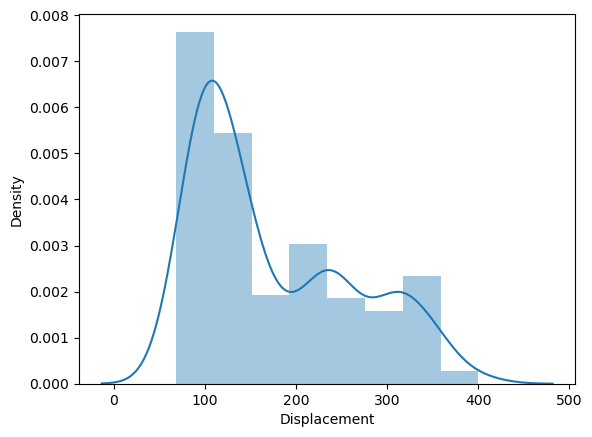

In [71]:
sns.distplot(df['Displacement'])
plt.show()

In [72]:
import numpy as np

In [73]:
df['log_disp']=np.log(df['Displacement'])

In [74]:
df.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name,log_disp
0,8.0,8,307.0,130.0,3504,12.0,2015,1,chevrolet,5.726848
2,18.0,8,318.0,150.0,3436,11.0,2015,1,plymouth,5.762051
3,16.0,8,304.0,150.0,3433,12.0,2015,1,amc,5.717028


C:\Users\user\AppData\Local\Temp\ipykernel_5348\1024435169.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_disp'])


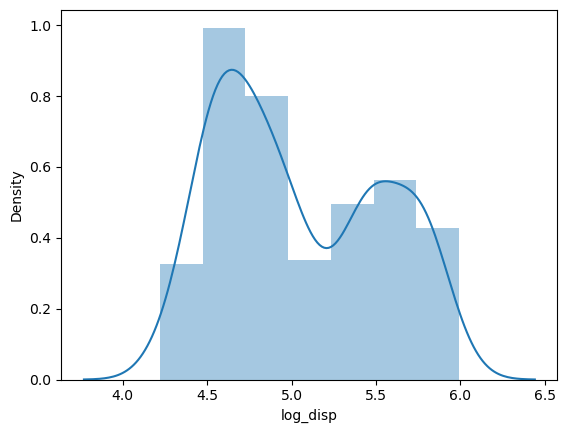

In [75]:
sns.distplot(df['log_disp'])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_5348\2601973532.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


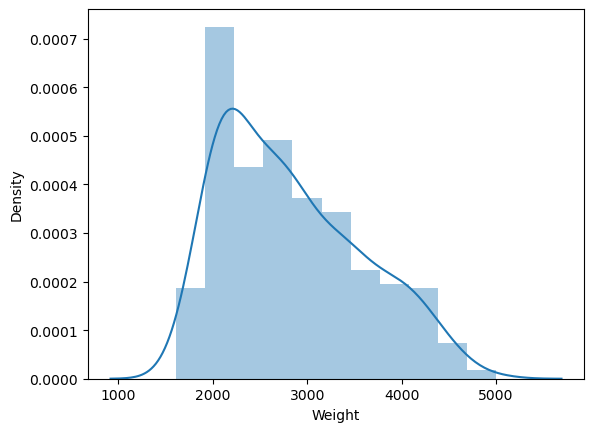

In [76]:
sns.distplot(df['Weight'])
plt.show()

In [77]:
df['log_weight']=np.log(df['Weight'])

In [78]:
df.head(3)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name,log_disp,log_weight
0,8.0,8,307.0,130.0,3504,12.0,2015,1,chevrolet,5.726848,8.161660
2,18.0,8,318.0,150.0,3436,11.0,2015,1,plymouth,5.762051,8.142063
3,16.0,8,304.0,150.0,3433,12.0,2015,1,amc,5.717028,8.141190


C:\Users\user\AppData\Local\Temp\ipykernel_5348\3821946205.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['log_weight'])


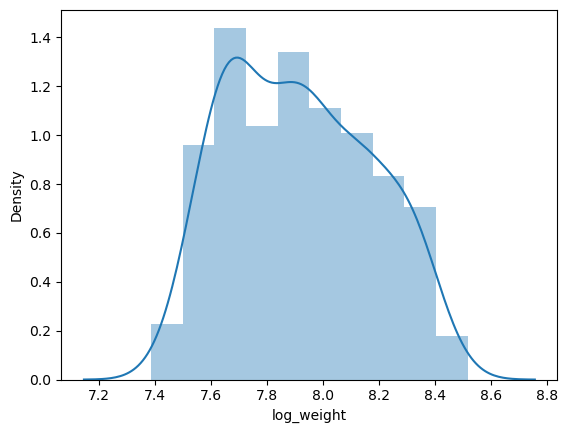

In [79]:
sns.distplot(df['log_weight'])
plt.show()

In [80]:
df=df.drop(['Displacement','Weight'],axis=1)

In [81]:
df.head()

,MPG,Cylinders,Horsepower,Acceleration,Model_year,Origin,Car_Name,log_disp,log_weight
0,8.0,8,130.0,12.0,2015,1,chevrolet,5.726848,8.161660
2,18.0,8,150.0,11.0,2015,1,plymouth,5.762051,8.142063
3,16.0,8,150.0,12.0,2015,1,amc,5.717028,8.141190
4,17.0,8,140.0,10.5,2015,1,ford,5.710427,8.145840
12,15.0,8,150.0,9.5,2015,1,chevrolet,5.991465,8.232440


In [82]:
df.dtypes

MPG             float64
Cylinders        object
Horsepower      float64
Acceleration    float64
Model_year       object
Origin           object
Car_Name         object
log_disp        float64
log_weight      float64
dtype: object

In [83]:
dummy.head()

,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Model_year_2004,Model_year_2005,Model_year_2006,Model_year_2007,Model_year_2008,Model_year_2009,...,Car_Name_opel,Car_Name_peugeot,Car_Name_plymouth,Car_Name_pontiac,Car_Name_renault,Car_Name_saab,Car_Name_toyota,Car_Name_triumph,Car_Name_volkswagen,Car_Name_volvo
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df_numeric=df.select_dtypes(include=['int64','float64'])

In [85]:
df_master=pd.concat([df_numeric,dummy],axis=1)

In [86]:
df_master.head()

,MPG,Horsepower,Acceleration,log_disp,log_weight,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Model_year_2004,...,Car_Name_opel,Car_Name_peugeot,Car_Name_plymouth,Car_Name_pontiac,Car_Name_renault,Car_Name_saab,Car_Name_toyota,Car_Name_triumph,Car_Name_volkswagen,Car_Name_volvo
0,8.0,130.0,12.0,5.726848,8.161660,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,150.0,11.0,5.762051,8.142063,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,16.0,150.0,12.0,5.717028,8.141190,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,140.0,10.5,5.710427,8.145840,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
12,15.0,150.0,9.5,5.991465,8.232440,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
#create x and y
x=df_master.drop('MPG',axis=1)

In [88]:
y=df_master['MPG']

In [89]:
x.shape

(350, 48)

In [90]:
y.shape

(350,)

In [91]:
#creating training and test samples
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=0)

In [92]:
#feature selection
key_features=SelectKBest(score_func=f_regression,k=5)
xtrain_selected=key_features.fit_transform(xtrain,ytrain)
selected_indices=key_features.get_support(indices=True)
selected_features=xtrain.columns[selected_indices]

In [93]:
selected_features

Index(['Horsepower', 'log_disp', 'log_weight', 'Cylinders_4', 'Cylinders_8'], dtype='object')

In [94]:
linreg=LinearRegression()

In [95]:
#store KBest columns from xtrain to xtrain_kbest
xtrain_kbest=xtrain[selected_features]

In [96]:
xtrain_kbest.head()

,Horsepower,log_disp,log_weight,Cylinders_4,Cylinders_8
334,100.0,4.248495,7.791523,0,0
175,70.0,4.499810,7.568896,1,0
112,85.0,4.804021,7.745003,1,0
2,150.0,5.762051,8.142063,0,1
198,53.0,4.510860,7.492760,1,0


In [97]:
#train your model
linreg.fit(xtrain_kbest,ytrain)

LinearRegression()

In [98]:
linreg.score(xtrain_kbest,ytrain)

0.7118189417837262

In [99]:
#test model 

In [100]:
#store kbest columns from xtest to xtest_kbest
xtest_kbest=xtest[selected_features]

In [101]:
pred_y=linreg.predict(xtest_kbest)

In [102]:
linreg.score(xtest_kbest,ytest)

0.7038559215939076

## Model 4: Check Multicollinearity

In [109]:
#check correlation
new_df_corr=df_numeric.corr()

In [108]:
df_numeric.head()

,MPG,Horsepower,Acceleration,log_disp,log_weight
0,8.0,130.0,12.0,5.726848,8.161660
2,18.0,150.0,11.0,5.762051,8.142063
3,16.0,150.0,12.0,5.717028,8.141190
4,17.0,140.0,10.5,5.710427,8.145840
12,15.0,150.0,9.5,5.991465,8.232440


<Axes: >

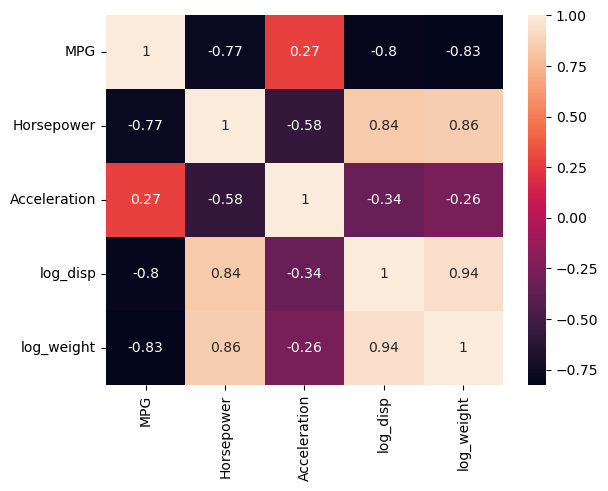

In [110]:
sns.heatmap(new_df_corr,annot=True)

In [111]:
#drop multicollinear variables from xtrain and xtest
xtrain=xtrain.drop(['log_weight','log_disp'],axis=1)

In [112]:
xtest=xtest.drop(['log_weight','log_disp'],axis=1)

In [113]:
#create key_features object to select top k features
#key_features=SelectKBest(score_func=f_regression,k='all')

key_features=SelectKBest(score_func=f_regression,k=5)
#to select 5 significant features

#fit the key_features to the training data and transform it
xtrain_selected=key_features.fit_transform(xtrain,ytrain)

#get the indices of the selected features
selected_indices=key_features.get_support(indices=True)

#get the names of the selected features
selected_features=xtrain.columns[selected_indices]

In [114]:
selected_features

Index(['Horsepower', 'Cylinders_4', 'Cylinders_8', 'Model_year_2005',
       'Origin_3'],
      dtype='object')

In [115]:
#store KBest columns from xtrain to xtrain_kbest
xtrain_kbest=xtrain[selected_features]

In [116]:
xtrain_kbest.head()

,Horsepower,Cylinders_4,Cylinders_8,Model_year_2005,Origin_3
334,100.0,0,0,1,1
175,70.0,1,0,0,0
112,85.0,1,0,0,0
2,150.0,0,1,0,0
198,53.0,1,0,0,1


In [117]:
#train your model
linreg.fit(xtrain_kbest,ytrain)

LinearRegression()

In [118]:
linreg.score(xtrain_kbest,ytrain)

0.7191991282910362

In [119]:
#store kbest columns from xtest to xtest_kbest
xtest_kbest=xtest[selected_features]

In [120]:
pred_y=linreg.predict(xtest_kbest)

In [121]:
linreg.score(xtest_kbest,ytest)

0.7288670006944613